# I have chosen No-show appointment dataset in this project, which this dataset contains 100k med- ical appointment in Brazil, and show or describe the question why the patient no attend.

## i have 6 questions in this project, I will analyze and answer it: 

<ol type ="1" , style="background-color:powderblue; ">
<a href ="#Q1" ><li >Are those who have diseases such as diabetes and Hipertension committed to the appointment more than others? </li> </a>
    <a href ="#Q2"><li > Is the one who has a Scholarship and attended the appointment more than the one who does not have? </li></a>
    <a href ="#Q3"><li > Do those who received text messages are more than attended? </li></a>
    <a href ="#Q4"> <li > Which neighborhood is the most attended? </li></a>
    <a  href ="#Q5" > <li > What is the average age of the most attended? and what is the gender ? </li></a>
    <a href ="#Q6"> <li>What is the year  of the most attended?</li> </a>

 </ol>

In [1]:
#import librirs 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# 1 Gather

In [2]:
!ls

Project 1
Project 2
check appo.ipynb
investigate a dataset.ipynb
investigate-a-dataset-template.ipynb
noshowappointments-kagglev2-may-2016.csv


In [3]:
# show max rows
pd.set_option('display.max_columns', None)

In [4]:
df =pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

# 2 Assess

In [5]:
# see the five rows of dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# see decribe and some statics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# i want now how many row and columns i have
df.shape

(110527, 14)

In [8]:
# see the data types of columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

# 3 Clean

In [9]:
# i convert to string to apply the change values
df['Scholarship'] = df['Scholarship'].apply(str)

In [10]:
# change the value of binary number to understand it
df['Scholarship']=df['Scholarship'].replace({'1' : 'true' , '0' : 'false' })

In [11]:
# drop columns that no interst
drop_columns = ['PatientId','AppointmentID','AppointmentDay','Alcoholism','Handcap']
for c in drop_columns:
    del df[c]

In [12]:
# icheck the columns i have now
df.shape

(110527, 9)

In [13]:
# check any miss values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110527 non-null  object
 1   ScheduledDay   110527 non-null  object
 2   Age            110527 non-null  int64 
 3   Neighbourhood  110527 non-null  object
 4   Scholarship    110527 non-null  object
 5   Hipertension   110527 non-null  int64 
 6   Diabetes       110527 non-null  int64 
 7   SMS_received   110527 non-null  int64 
 8   No-show        110527 non-null  object
dtypes: int64(4), object(5)
memory usage: 7.6+ MB


In [14]:
# i check any miss values again

df.isnull().sum()


Gender           0
ScheduledDay     0
Age              0
Neighbourhood    0
Scholarship      0
Hipertension     0
Diabetes         0
SMS_received     0
No-show          0
dtype: int64

In [15]:
# i save my dataset copy 
df1=df.copy()

In [16]:
# rename No-show column to more clearly 
df=df.rename(columns={'No-show':'is_attend'})

In [17]:
# i exctract year only here from string
df['year']=df['ScheduledDay'].apply(lambda x: x.split('-')[0])

In [18]:
# i convert year to int
df['year'] = df['year'].apply(int)


In [19]:
# i drop this columns because i get the year
del df['ScheduledDay']

In [20]:
# i change values to [yes] -- > mean is attend
df['is_attend'] = df['is_attend'].replace({'No':'yes' , 'Yes':'no'})

In [21]:
# i change all values from binary to understand it
df['Hipertension'] = df['Hipertension'].apply(str)

df['Hipertension']=df['Hipertension'].replace({'1' : 'true' , '0' : 'false' })

df['Hipertension']

0          true
1         false
2         false
3         false
4          true
          ...  
110522    false
110523    false
110524    false
110525    false
110526    false
Name: Hipertension, Length: 110527, dtype: object

In [22]:
# i change all values from binary to understand it

df['Diabetes'] = df['Diabetes'].apply(str)

df['Diabetes']=df['Diabetes'].replace({'1' : 'true' , '0' : 'false' })

df['Diabetes']

0         false
1         false
2         false
3         false
4          true
          ...  
110522    false
110523    false
110524    false
110525    false
110526    false
Name: Diabetes, Length: 110527, dtype: object

In [23]:
# i check my dataset

df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,SMS_received,is_attend,year
0,F,62,JARDIM DA PENHA,false,true,false,0,yes,2016
1,M,56,JARDIM DA PENHA,false,false,false,0,yes,2016
2,F,62,MATA DA PRAIA,false,false,false,0,yes,2016
3,F,8,PONTAL DE CAMBURI,false,false,false,0,yes,2016
4,F,56,JARDIM DA PENHA,false,true,true,0,yes,2016


# <p id='Q1'> َQ1 : Are those who have diseases such as diabetes and Hipertension committed to the appointment more than others?  </p>

In [24]:
# i save number of all no have diseases
noـdiseases = df[(df.Diabetes != 'true') & (df.Hipertension != "true" )]

noـdiseases.count()['Gender']

87269

In [25]:
# i check  all no have diseases is attend ?

df[(df.Hipertension != 'true')&(df.Diabetes != 'true')].groupby('is_attend').count()['Gender']

is_attend
no     18258
yes    69011
Name: Gender, dtype: int64

In [26]:
# i check  all  have diseases is attend ?

df[(df.Diabetes == 'true')&(df.Hipertension == "true" )].groupby('is_attend').count()['Gender']

is_attend
no     1141
yes    5345
Name: Gender, dtype: int64

In [27]:
# i save kind plot to ' bar'
kbar='bar'

## who have a Diabetes and Hipertension


Text(0, 0.5, 'Number of attendees')

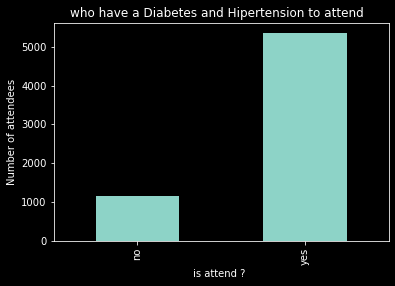

In [73]:
# idraw the who have a Diabetes and Hipertension is attend or no 
df_draw=df[(df.Diabetes == 'true')&(df.Hipertension == "true" )].groupby('is_attend').count()['Gender']


df_draw.plot(kind=kbar)
plt.title('who have a Diabetes and Hipertension to attend  ')
plt.xlabel('is attend ? ')
plt.ylabel('Number of attendees')


## who dosen't have a Diabetes and Hipertension


Text(0, 0.5, 'Number of attendees')

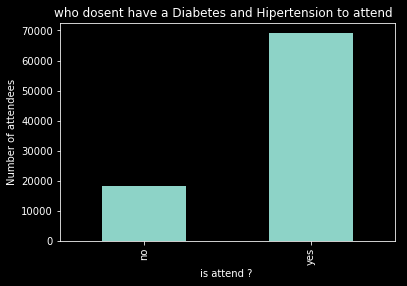

In [72]:
# idraw the who doen't have a Diabetes and Hipertension is attend or no 

df_draw1=df[(df.Diabetes != 'true')&(df.Hipertension != "true" )].groupby('is_attend').count()['Gender']


df_draw1.plot(kind=kbar)
plt.title('who dosent have a Diabetes and Hipertension to attend  ')
plt.xlabel('is attend ? ')
plt.ylabel('Number of attendees')


#  </hr>

# <div style='color : green'> question answer ONE </div>


### <p style='color : green'> Those who do not have any of the diseases attend more, so the disease has nothing to do with to attend </p>



#  </hr>

# <p id='Q2'> Q2 : Is the one who has a Scholarship and attended the appointment more than the one who does not have? </p>

In [30]:
# i check number of all who have Scholarship is attend ?


df[df.Scholarship == 'true'].groupby('is_attend').count()['Gender']

is_attend
no     2578
yes    8283
Name: Gender, dtype: int64

In [31]:
# i check number of all who doesn't have Scholarship is attend ?

df[df.Scholarship != 'true'].groupby('is_attend').count()['Gender']

is_attend
no     19741
yes    79925
Name: Gender, dtype: int64

# <div style ='color : blue' >who has a Scholarship

Text(0, 0.5, 'Number of attendees')

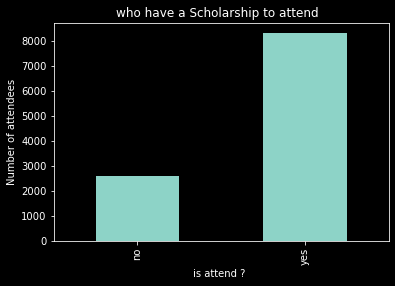

In [71]:
# i draw of all who have Scholarship is attend ?

df_draw=df[df.Scholarship == 'true'].groupby('is_attend').count()['Gender']


df_draw.plot(kind=kbar)
plt.title('who have a Scholarship to attend  ')
plt.xlabel('is attend ? ')
plt.ylabel('Number of attendees')


# <div style ='color : red' >who doesn't have  a Scholarship

Text(0, 0.5, 'Number of attendees')

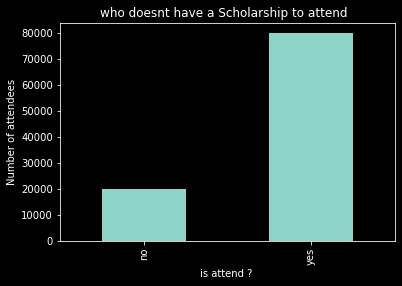

In [70]:
# i draw  of all who dosen't have Scholarship is attend ?

df_draw=df[df.Scholarship != 'true'].groupby('is_attend').count()['Gender']


df_draw.plot(kind=kbar)

plt.title('who doesnt have a Scholarship to attend  ')
plt.xlabel('is attend ? ')
plt.ylabel('Number of attendees')


# </hr>

# <div style='color : green'> question answer TWO </div>


### <p style='color : green'> Those who dosen't have a Scholarship attend more , so the Scholarship has nothing to do with to attend </p>



# </hr>

In [34]:
# i save the kind plot pie -- > to kpie 
kpie = 'pie'

# <p id='Q3'> Q3 : Do those who received text messages are more than attended?  </p>

In [35]:
# i run this because near to check quick
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,SMS_received,is_attend,year
0,F,62,JARDIM DA PENHA,false,true,false,0,yes,2016
1,M,56,JARDIM DA PENHA,false,false,false,0,yes,2016
2,F,62,MATA DA PRAIA,false,false,false,0,yes,2016
3,F,8,PONTAL DE CAMBURI,false,false,false,0,yes,2016
4,F,56,JARDIM DA PENHA,false,true,true,0,yes,2016


In [36]:
# i check number of all who received text messages is attend 

df[df.SMS_received >= 1].groupby('is_attend').count()['Gender']

is_attend
no      9784
yes    25698
Name: Gender, dtype: int64

# who rescive message 

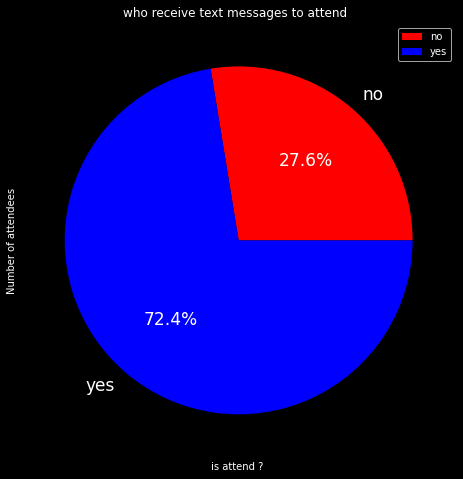

In [69]:
# i draw of all who received text messages 


df_draw = df[df.SMS_received >= 1].groupby('is_attend').count()['Gender']
df_draw.plot(kind=kpie,figsize=(8,8),colors=['red','blue'],autopct='%1.1f%%', fontsize=17);

plt.title('who receive text messages to attend  ')
plt.xlabel('is attend ? ')
plt.ylabel('Number of attendees')
plt.legend()


# who don't rescive message 

In [38]:
# i check number of all who don't received text messages is attend 

df[df.SMS_received < 1].groupby('is_attend').count()['Gender']

is_attend
no     12535
yes    62510
Name: Gender, dtype: int64

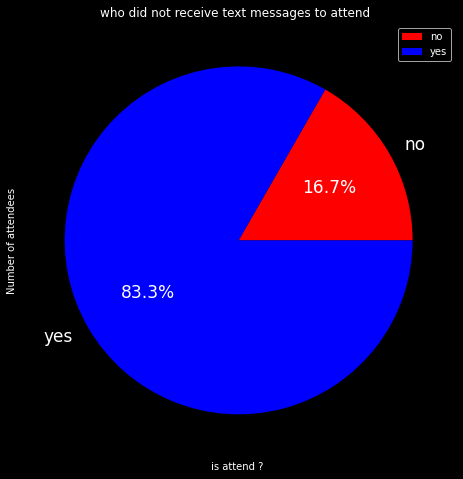

In [68]:
# i draw  of all who don't received text messages is attend 

df_draw = df[df.SMS_received < 1].groupby('is_attend').count()['Gender']
df_draw.plot(kind=kpie,figsize=(8,8),colors=['red','blue'],autopct='%1.1f%%', fontsize=17)
plt.title('who did not receive text messages to attend  ')
plt.xlabel('is attend ? ')
plt.ylabel('Number of attendees')
plt.legend()


# <hr>

# <div style='color : green'> question answer THREE </div>


### <p style='color : green'> Those who didn't receive a message attend more , so the receive a message has nothing to do with to attend </p>


# </hr>

# <p id='Q4'> Q4 : Which neighborhood is the most attended?   </p>

In [40]:
#how many number of all who attend and not attend 
df.groupby("is_attend")['Neighbourhood'].count()

is_attend
no     22319
yes    88208
Name: Neighbourhood, dtype: int64

In [41]:
# iwant see top 3 of Neighbourhood is attend
df[df['is_attend']=='yes'].groupby("Neighbourhood")['is_attend'].count().sort_values(ascending=False)

Neighbourhood
JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: is_attend, Length: 80, dtype: int64

In [42]:
# i save in countplot the sort values of top Neighbourhood is attend
countplot = df[df['is_attend']=='yes'].groupby("Neighbourhood")['is_attend'].count().sort_values(ascending=False)

In [43]:
# take only top 10 of Neighbourhood is attend
top10 = countplot[0:10]

# <div style="color : blue">Top 10 of the most Neighbourhood attended</div>

Text(0, 0.5, 'Number of attendees')

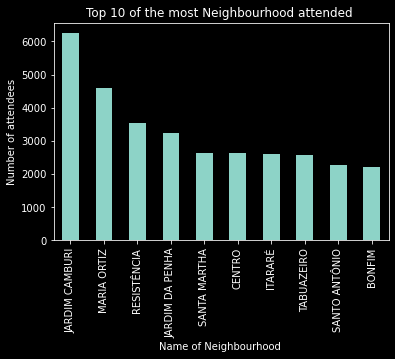

In [66]:
# i draw top 10 of Neighbourhood is attend
top10.plot(kind=kbar)
plt.title('Top 10 of the most Neighbourhood attended ')
plt.xlabel('Name of Neighbourhood ')
plt.ylabel('Number of attendees')


# <hr>

# <div style='color : green'> question answer FOUR </div>


### <p style='color : green'> JARDIM CAMBURI It is the most attended neighborhood  </p>


# </hr>

# <p id='Q5'> Q5 : What is the average age of the most attended? and what is the gender ?</p>

In [45]:
# quick check 
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,SMS_received,is_attend,year
0,F,62,JARDIM DA PENHA,false,true,false,0,yes,2016
1,M,56,JARDIM DA PENHA,false,false,false,0,yes,2016
2,F,62,MATA DA PRAIA,false,false,false,0,yes,2016
3,F,8,PONTAL DE CAMBURI,false,false,false,0,yes,2016
4,F,56,JARDIM DA PENHA,false,true,true,0,yes,2016


In [46]:
# take mean of age
mean_Age=df.Age.mean()

In [47]:
# save greater or equal than mean of age to [old] is attend
df.loc[((df.Age >= mean_Age) & (df.is_attend == 'yes')), "old"] = "is_come"

In [48]:
# save less than mean of age to [young] is attend

df.loc[((df.Age < mean_Age) & (df.is_attend == 'yes')), "young"] = "is_come"

In [49]:
# check new column
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,SMS_received,is_attend,year,old,young
0,F,62,JARDIM DA PENHA,false,true,false,0,yes,2016,is_come,NaN
1,M,56,JARDIM DA PENHA,false,false,false,0,yes,2016,is_come,NaN
2,F,62,MATA DA PRAIA,false,false,false,0,yes,2016,is_come,NaN
3,F,8,PONTAL DE CAMBURI,false,false,false,0,yes,2016,NaN,is_come
4,F,56,JARDIM DA PENHA,false,true,true,0,yes,2016,is_come,NaN


In [50]:
# check the [old] is greater than [young] is attend
df.old.value_counts() > df.young.value_counts()

is_come    True
dtype: bool

##### see the output is [ True ]  mean old is more attend than young

<hr>

In [51]:
# who gender is more attend
df.groupby('Gender')['old'].value_counts()

Gender  old    
F       is_come    30447
M       is_come    14405
Name: old, dtype: int64

In [52]:
# count of Gender is attend from [ old ]
Female = df.groupby('Gender')['old'].value_counts()[0]
Male = df.groupby('Gender')['old'].value_counts()[1]

##### see the output is ( Female ) is more attend than ( male )

<hr>

In [53]:
#the old age groupby gender
Gender_old=df.groupby('Gender')['old'].value_counts()

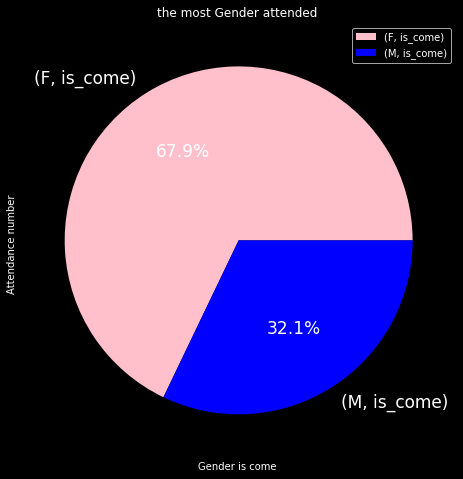

In [65]:
# draw the gender who most attend 
Gender_old.plot(kind=kpie,figsize=(8,8),colors=['pink','blue'],autopct='%1.1f%%', fontsize=17)

plt.title("the most Gender attended ")
plt.xlabel("Gender is come ")
plt.ylabel("Attendance number  ")
plt.legend()


# <hr>

# <div style='color : green'> question answer Five </div>


### <p style='color : green'> Most of the attendees are over the age of 38, and the female gender is even more   </p>


# </hr>


# <p id='Q6'> Q6 : What is the year  of the most attended? </p>

In [55]:
# see the unique of values year dataset have
df.year.unique()

array([2016, 2015])

In [56]:
# i filtter count of 2016 year who is attend only 
year_2016 = df[(df.is_attend == 'yes') & (df.year == 2016)].count()['Gender']

In [57]:
#count total of who attend in 2016
year_2016

88165

In [58]:
# i filtter count of 2015 year who is attend only 

year_2015 = df[(df.is_attend == 'yes') & (df.year == 2015)].count()['Gender']

In [59]:
#count total of who attend in 2015

year_2015

43

In [75]:
all_year = [year_2015,year_2016]

In [77]:
# plt.figure(figsize=(5, 5), dpi=100)
# plt.scatter(all_year ,df['Age'] , s=40 , c='r');

# plt.title('the ages of most attend in years ')
# plt.xlabel('Year')
# plt.ylabel('Age')
# plt.text(10, 115, 'blue: show up \ngreen: didnt show up', style='italic',
#         bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

Text(0, 0.5, 'Number of attendees')

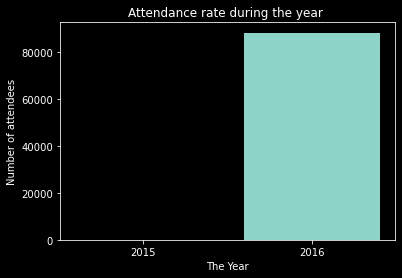

In [63]:
# i draw the count for two years 2015 & 2016
locations = [2015, 2016]
heights = [year_2015, year_2016]
labels = ['2015', '2016']
plt.style.use('dark_background')
plt.bar(locations, heights,tick_label=labels)
plt.title('Attendance rate during the year ')
plt.xlabel('The Year')
plt.ylabel('Number of attendees')


# <hr>

# <div style='color : green'> question answer SIX </div>


### <p style='color : green'> 2016 is the most attended year   </p>


# </hr>

<span> </span>

</hr>

</hr>

## Conclusions After analyzing the data and the questions above we saw many facts that might be affect to attend to the appointment, some of this facts:

1- we saw above in the question 1 the diabetes and Hipertension not be affect to  attend to appointment 

2- we saw above in the question 2 Most of the attendees are who dosen't have a Scholarship is more attend to the appointment. 

3- we saw above in the question 3 Those who didn't receive a message attend more  of the attendance who receive the SMS message 
4- we saw above in the question 4 The neighborhood   JARDIM CAMBURI It is the most attended neighborhood 

5- we saw above in the question 5 Most of the attendees are over the age of 38, and the female  is even more male by 67.9% is attend

6-  we saw above in the question 6 Most of the attendees are in 2016 is the most attended year 


<hr>

# limitations

in the analyzing above, I was hoping to have more information like  the departments name in the hospital and The names of the people and the number of times he committed and attended the hospital 

i think the result or the information above only limit to one place or hospital so you can’t depend on it.





